#　参考
- https://github.com/wadayama/DU-Book/tree/main

In [26]:
import numpy as np
import jax

import matplotlib.pyplot as plt
import japanize_matplotlib
import math
import pandas as pd
from jax.example_libraries import optimizers

In [27]:
delta = 0.05
beta = 20.0

In [28]:
def rbf(x, beta):
    return np.exp(-beta*x**2)

In [29]:
xs = np.linspace(-1,2.5,100)

In [30]:
N = 50
df = pd.DataFrame()
df["x"] = xs
sample_columns = []
for i in range(N):
    colum = "sample_{}".format(i)
    df[colum] = rbf(xs - delta*(i-1)+0.5, beta)
    sample_columns.append(colum)

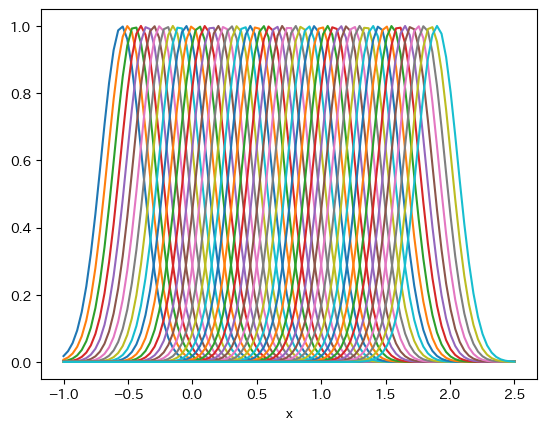

In [31]:
df.plot(x= "x", y = sample_columns, legend=False);

In [32]:
def rbf_func(x, theta):
    tmp_x = - delta * (np.arange(len(theta))) + x + 0.5
    rbfs = rbf(tmp_x, beta)
    return np.sum(theta * rbfs)

In [33]:
def Fit(T, N, theta):
    dx = T/N
    J = 0
    for i in range(N):
        u = rbf_func((i+1)*dx,  theta)
        # print(u)
        f = np.exp(-5*(i+1)*dx)*np.sin(5*(i+1)*dx)
        J += (u - f)**2
    return J

# 勾配降下法（手書き）版

In [34]:
# @jax.jit
def train(T, N, theta, lr):
    new_theta = theta
    for i in range(train_itr):
        gs = jax.grad(Fit, argnums=-1)(T, N, new_theta)
        new_theta -= lr * gs
        # print(new_theta, gs)
        print(Fit(T, N, new_theta))
    return new_theta

In [35]:
N = 100
T = 1.0
theta_train = np.ones(50)
train_itr = 500

new_theta = train(T, N, theta_train, 0.003)

2294.047
870.9848
338.923
138.58273
62.34261
32.734123
20.74108
15.461668
12.787417
11.163548
9.997196
9.058595
8.255521
7.5481944
6.9171305
6.35095
5.8417425
5.3832664
4.9702363
4.5980244
4.262512
3.960014
3.68722
3.4411516
3.2191355
3.0187614
2.8378634
2.6744928
2.526895
2.3934927
2.2728672
2.16374
2.0649607
1.9754981
1.8944194
1.8208876
1.7541502
1.6935287
1.6384138
1.588256
1.542563
1.5008888
1.4628353
1.4280416
1.396184
1.3669727
1.3401437
1.3154622
1.2927161
1.2717144
1.2522851
1.2342732
1.2175409
1.2019614
1.1874231
1.1738241
1.1610727
1.1490879
1.1377949
1.1271275
1.1170259
1.1074356
1.0983089
1.0896018
1.0812749
1.0732929
1.0656233
1.0582391
1.0511122
1.0442212
1.0375443
1.0310628
1.0247597
1.0186193
1.0126281
1.0067738
1.0010457
0.9954328
0.9899262
0.98451793
0.97920036
0.97396725
0.96881187
0.9637292
0.9587152
0.9537635
0.9488716
0.9440353
0.9392514
0.93451697
0.9298298
0.92518634
0.9205855
0.91602486
0.9115026
0.9070172
0.9025671
0.8981508
0.8937671
0.8894153
0.88509375
0.8

In [36]:
df = pd.DataFrame()
xs = np.linspace(0,1,100)

init = []
trained = []
exact = []
dx = T/N
for x in xs:
    init.append(rbf_func(x, theta_train))
    trained.append(rbf_func(x, new_theta))
    exact.append(np.exp(-5*x)*np.sin(5*x))
df["x"] = xs
df["init_RBF"] = init
df["trained_RBF"] = trained
df["trained_RBF"] = df["trained_RBF"].astype(float)
df["Exact"] = exact

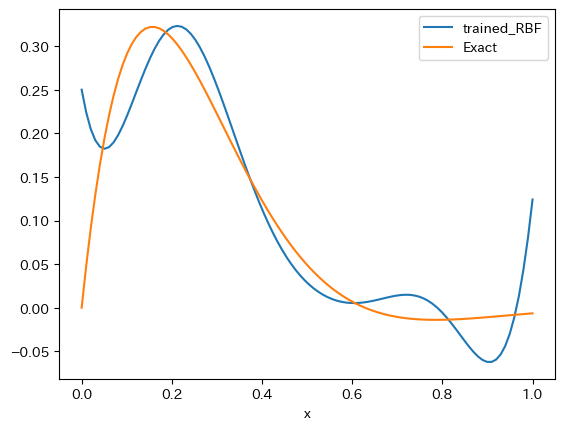

In [37]:
df.plot("x", ["trained_RBF", "Exact"]);#, "init_RBF"])

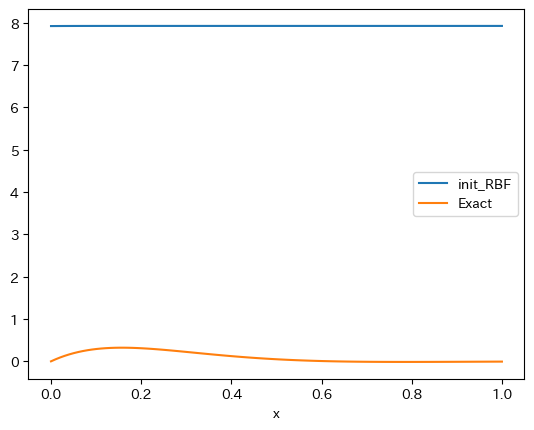

In [38]:
df.plot("x", ["init_RBF", "Exact"]);

# Adam版

In [39]:
@jax.jit
def step(step, opt_state):
    value, grads = jax.value_and_grad(Fit, argnums=-1)(T, N, get_params(opt_state))
    opt_state = opt_update(step, grads, opt_state)
    return value, opt_state

In [40]:
opt_init, opt_update, get_params = optimizers.adam(1.0)
opt_state = opt_init(theta_train)

train_itr = 250
for i in range(train_itr):
    value, opt_state = step(i, opt_state)
    print(value)

6126.3545
2.4986925
2845.6492
3390.901
1407.2493
52.03529
468.81662
1518.127
1704.4784
969.65027
183.39551
38.072872
479.442
894.8875
833.9362
409.6088
50.728245
46.53901
305.83176
501.61932
430.21347
185.57544
12.053229
46.304485
201.43254
285.72296
212.26746
68.78971
0.083148226
52.637157
141.15764
157.27455
87.75605
13.228106
7.319091
58.26378
94.40775
72.68331
22.200281
0.13277584
22.545502
52.18027
49.819614
20.488771
0.5200157
9.419542
29.030388
31.403624
14.542388
0.72214794
4.921364
17.165667
19.090034
8.713504
0.3468522
3.4158223
10.914365
11.2634
4.4159493
0.043762814
2.9254918
7.246854
6.265538
1.7416712
0.1016505
2.6992946
4.739952
3.0714905
0.39930063
0.43756035
2.3819523
2.8235614
1.1587114
0.0060803546
0.795139
1.837475
1.3739264
0.23183353
0.13558279
0.92962927
1.1335424
0.4439468
0.0028691702
0.3739985
0.75885123
0.4844191
0.044909354
0.11572759
0.44303015
0.4104391
0.095543735
0.024149999
0.23574911
0.30238652
0.11329009
0.0029543021
0.118238196
0.20547329
0.10488108


In [41]:
df = pd.DataFrame()
xs = np.linspace(0,1,100)

init = []
trained = []
exact = []
dx = T/N
for x in xs:
    init.append(rbf_func(x, theta_train))
    trained.append(rbf_func(x, get_params(opt_state)))
    exact.append(np.exp(-5*x)*np.sin(5*x))
df["x"] = xs
df["init_RBF"] = init
df["trained_RBF"] = trained
df["trained_RBF"] = df["trained_RBF"].astype(float)
df["Exact"] = exact

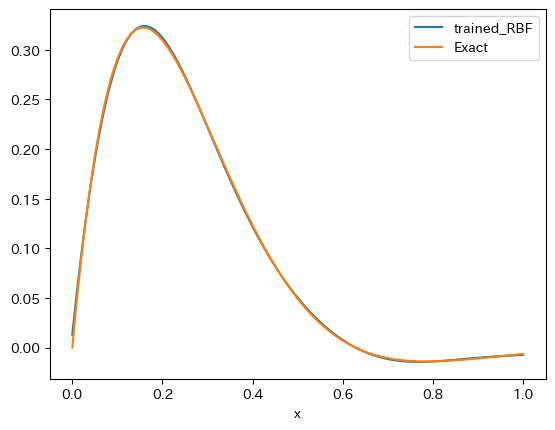

In [42]:
df.plot("x", ["trained_RBF", "Exact"]);